# Preparing & Cleaning Data for Machine Learning

### Dealing with Missing Values

In [2]:
import pandas as pd
import numpy as np      

In [13]:
my_df = pd.DataFrame({"A" : [1,2,4,np.nan,5,np.nan,7], 
                      "B":[4,np.nan,7,np.nan,1,np.nan,2]})

In [5]:
my_df.isna()
my_df.isna().sum()

A    2
B    3
dtype: int64

In [6]:
my_df.dropna()

,A,B
0,1.0,4.0
2,4.0,7.0
4,5.0,1.0
6,7.0,2.0


In [7]:
my_df.dropna(how = 'any')

,A,B
0,1.0,4.0
2,4.0,7.0
4,5.0,1.0
6,7.0,2.0


In [8]:
my_df.dropna(how = 'all')

,A,B
0,1.0,4.0
1,2.0,NaN
2,4.0,7.0
4,5.0,1.0
6,7.0,2.0


In [11]:
my_df.dropna(how = 'any', subset=["A"])

,A,B
0,1.0,4.0
1,2.0,NaN
2,4.0,7.0
4,5.0,1.0
6,7.0,2.0


In [12]:
my_df.dropna(how = 'any', inplace=True)

recommendation is dropping rows than filling them   

if filling, better with a constant value

In [14]:
#rerun dataframe
my_df.fillna(value= 100)

,A,B
0,1.0,4.0
1,2.0,100.0
2,4.0,7.0
3,100.0,100.0
4,5.0,1.0
5,100.0,100.0
6,7.0,2.0


In [15]:
mean_value = my_df["A"].mean()
my_df["A"].fillna(value=mean_value)


0    1.0
1    2.0
2    4.0
3    3.8
4    5.0
5    3.8
6    7.0
Name: A, dtype: float64

In [17]:
my_df.fillna(value=my_df.mean(), inplace=True)
print(my_df)

     A    B
0  1.0  4.0
1  2.0  3.5
2  4.0  7.0
3  3.8  3.5
4  5.0  1.0
5  3.8  3.5
6  7.0  2.0


### Dealing with Missing Values - SimpleImputer

In [19]:
from sklearn.impute import SimpleImputer

In [22]:
my_df = pd.DataFrame({"A" : [1,4,7,10,13], 
                      "B":[3,6,9,np.nan,15],
                      "C":[2,5,np.nan,11,np.nan]})

In [21]:
imputer = SimpleImputer()

In [23]:
#fit and transform
imputer.fit(my_df)

SimpleImputer()

In [24]:
imputer.transform(my_df)
#could have done imputer.fit_transform(my_df)
#only use fit and transform on training data

array([[ 1.  ,  3.  ,  2.  ],
       [ 4.  ,  6.  ,  5.  ],
       [ 7.  ,  9.  ,  6.  ],
       [10.  ,  8.25, 11.  ],
       [13.  , 15.  ,  6.  ]])

In [26]:
my_df2 = pd.DataFrame(imputer.fit_transform(my_df),columns = my_df.columns)
print(my_df2)

      A      B     C
0   1.0   3.00   2.0
1   4.0   6.00   5.0
2   7.0   9.00   6.0
3  10.0   8.25  11.0
4  13.0  15.00   6.0


In [28]:
imputer.fit_transform(my_df[["B"]])
# will learn the rules based from column b
my_df["B"]= imputer.fit_transform(my_df[["B"]])
print(my_df)


    A      B     C
0   1   3.00   2.0
1   4   6.00   5.0
2   7   9.00   NaN
3  10   8.25  11.0
4  13  15.00   NaN


### Dealing with Missing Values - KNNImputer (PRACTICAL)

In [33]:
from sklearn.impute import KNNImputer

In [30]:
my_df = pd.DataFrame({"A" : [1,2,3,4,5], 
                      "B":[1,1,3,3,4],
                      "C":[1,2,9,np.nan,20]})
print(my_df)

   A  B     C
0  1  1   1.0
1  2  1   2.0
2  3  3   9.0
3  4  3   NaN
4  5  4  20.0


In [35]:
# estimating a value for column C
knn_imputer = KNNImputer()

In [36]:
knn_imputer.fit_transform(my_df)
#default value of 5 neighbors

array([[ 1.,  1.,  1.],
       [ 2.,  1.,  2.],
       [ 3.,  3.,  9.],
       [ 4.,  3.,  8.],
       [ 5.,  4., 20.]])

In [37]:
knn_imputer = KNNImputer(n_neighbors=1)
knn_imputer.fit_transform(my_df)

array([[ 1.,  1.,  1.],
       [ 2.,  1.,  2.],
       [ 3.,  3.,  9.],
       [ 4.,  3.,  9.],
       [ 5.,  4., 20.]])

In [38]:
knn_imputer = KNNImputer(n_neighbors=2)
knn_imputer.fit_transform(my_df)

array([[ 1. ,  1. ,  1. ],
       [ 2. ,  1. ,  2. ],
       [ 3. ,  3. ,  9. ],
       [ 4. ,  3. , 14.5],
       [ 5. ,  4. , 20. ]])

more realistic values

In [39]:
# weights are uniform by default
knn_imputer = KNNImputer(n_neighbors=2, weights="distance")
knn_imputer.fit_transform(my_df)
# reason, 9 and 20 ?

array([[ 1.        ,  1.        ,  1.        ],
       [ 2.        ,  1.        ,  2.        ],
       [ 3.        ,  3.        ,  9.        ],
       [ 4.        ,  3.        , 13.55634919],
       [ 5.        ,  4.        , 20.        ]])

In [42]:
my_df1 = pd.DataFrame(knn_imputer.fit_transform(my_df), columns=my_df.columns)
print(my_df1)

     A    B          C
0  1.0  1.0   1.000000
1  2.0  1.0   2.000000
2  3.0  3.0   9.000000
3  4.0  3.0  13.556349
4  5.0  4.0  20.000000


# Dealing with Categorical Variables - One Hot Encoder (PRACTICAL)

In [54]:
from sklearn.preprocessing import OneHotEncoder

In [67]:
x = pd.DataFrame({"input1" : [1,2,3,4,5], 
                      "input2":["A","A","B","B","C"],
                      "input3":["x","x","x","y","y"]})


In [68]:
categorical_vars = ["input2","input3"]

one_hot_encoder = OneHotEncoder(sparse=False)# array is easier to use and viduallize 
encoder_vars_array = one_hot_encoder.fit_transform(x[categorical_vars])
print(encoder_vars_array)

[[1. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0.]
 [0. 1. 0. 1. 0.]
 [0. 1. 0. 0. 1.]
 [0. 0. 1. 0. 1.]]


c:\Users\eacalder\.conda\envs\DSInfinity\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [69]:
encoder_feature_names = one_hot_encoder.get_feature_names_out(categorical_vars)
print(encoder_feature_names)

['input2_A' 'input2_B' 'input2_C' 'input3_x' 'input3_y']


In [70]:
encoder_vars_df = pd.DataFrame(encoder_vars_array,columns=encoder_feature_names)
print(encoder_vars_df)

   input2_A  input2_B  input2_C  input3_x  input3_y
0       1.0       0.0       0.0       1.0       0.0
1       1.0       0.0       0.0       1.0       0.0
2       0.0       1.0       0.0       1.0       0.0
3       0.0       1.0       0.0       0.0       1.0
4       0.0       0.0       1.0       0.0       1.0


In [71]:
x_new = pd.concat([x.reset_index(drop=True),encoder_vars_df.reset_index(drop=True)], axis=1)
# reset index to ensure no rows are not aligned
print(x_new)

   input1 input2 input3  input2_A  input2_B  input2_C  input3_x  input3_y
0       1      A      x       1.0       0.0       0.0       1.0       0.0
1       2      A      x       1.0       0.0       0.0       1.0       0.0
2       3      B      x       0.0       1.0       0.0       1.0       0.0
3       4      B      y       0.0       1.0       0.0       0.0       1.0
4       5      C      y       0.0       0.0       1.0       0.0       1.0


In [72]:
# drop the original input 2 and 3
x_new.drop(categorical_vars, axis=1,inplace=True)
print(x_new)

   input1  input2_A  input2_B  input2_C  input3_x  input3_y
0       1       1.0       0.0       0.0       1.0       0.0
1       2       1.0       0.0       0.0       1.0       0.0
2       3       0.0       1.0       0.0       1.0       0.0
3       4       0.0       1.0       0.0       0.0       1.0
4       5       0.0       0.0       1.0       0.0       1.0


In [78]:
x = pd.DataFrame({"input1" : [1,2,3,4,5], 
                      "input2":["A","A","B","B","C"],
                      "input3":["x","x","x","y","y"]})
categorical_vars = ["input2","input3"]
one_hot_encoder = OneHotEncoder(sparse=False, drop="first")# array is easier to use and viduallize 
encoder_vars_array = one_hot_encoder.fit_transform(x[categorical_vars])
encoder_feature_names = one_hot_encoder.get_feature_names_out(categorical_vars)
encoder_vars_df = pd.DataFrame(encoder_vars_array,columns=encoder_feature_names)
x_new = pd.concat([x.reset_index(drop=True),encoder_vars_df.reset_index(drop=True)], axis=1)
# reset index to ensure no rows are not aligned
# drop the original input 2 and 3
x_new.drop(categorical_vars, axis=1,inplace=True)
print(x_new)

   input1  input2_B  input2_C  input3_y
0       1       0.0       0.0       0.0
1       2       0.0       0.0       0.0
2       3       1.0       0.0       0.0
3       4       1.0       0.0       1.0
4       5       0.0       1.0       1.0


c:\Users\eacalder\.conda\envs\DSInfinity\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ready now for the machine learning

# Dealing with Outliers (PRACTICAL)

outliers should only be removed if model will have significant unguidance

In [88]:
x = pd.DataFrame({"input1" : [15,41,44,47,50,53,56,59,99], 
                      "input2":[29,41,44,47,50,53,56,59,66]})

<AxesSubplot: >

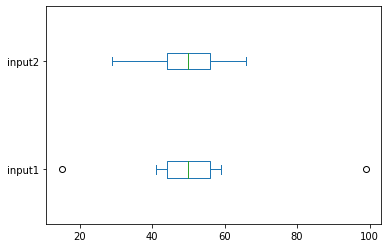

In [89]:
x.plot(kind="box",vert=False)

2 outliers detected in column input1
0 outliers detected in column input2


<AxesSubplot: >

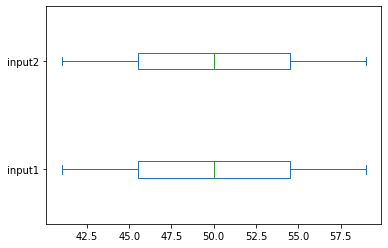

In [90]:
#boxplot approach
outlier_columns = ["input1", "input2"]
for column in outlier_columns:
    lower_quartile = x[column].quantile(.25)
    upper_quartile = x[column].quantile(.75)
    iqr= upper_quartile - lower_quartile
    iqr_extend = iqr *1.5
    min_border = lower_quartile - iqr_extend
    max_border = upper_quartile + iqr_extend

    outliers = x[(x[column]<min_border)|(x[column]>max_border)].index
    print(f"{len(outliers)} outliers detected in column {column}")

    x.drop(outliers,inplace=True)

x.plot(kind="box",vert=False)

0 outliers detected in column input1
0 outliers detected in column input2


<AxesSubplot: >

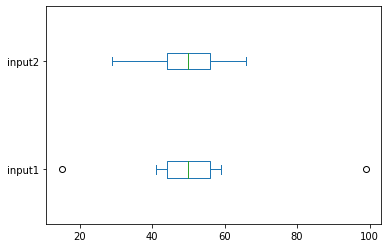

In [96]:
# standard deviation approach
x = pd.DataFrame({"input1" : [15,41,44,47,50,53,56,59,99], 
                      "input2":[29,41,44,47,50,53,56,59,66]})
outlier_columns = ["input1", "input2"]
for column in outlier_columns:
    mean = x[column].mean()
    std_dev = x[column].std()
    min_border = mean-std_dev*3
    max_border = mean+std_dev*3

    outliers = x[(x[column]<min_border)|(x[column]>max_border)].index
    print(f"{len(outliers)} outliers detected in column {column}")

    x.drop(outliers,inplace=True)

x.plot(kind="box",vert=False)

Feature Scaling for Machine Learning (PRACTICAL)

In [4]:
from sklearn.preprocessing import StandardScaler

In [3]:
x = pd.DataFrame({"Height" : [1.98, 1.77,1.76,1.80, 1.64], 
                  "Weight" : [99,81,70,86,82]})

In [5]:
scale_standard = StandardScaler()
scale_standard.fit_transform(x)

array([[ 1.73445477,  1.646894  ],
       [-0.18257419, -0.27804704],
       [-0.27386128, -1.45439989],
       [ 0.09128709,  0.2566588 ],
       [-1.36930639, -0.17110587]])

In [6]:
scale_standard.fit_transform(x[["Height"]])

array([[ 1.73445477],
       [-0.18257419],
       [-0.27386128],
       [ 0.09128709],
       [-1.36930639]])

In [8]:
my_df_standardised = pd.DataFrame(scale_standard.fit_transform(x),columns=x.columns)
my_df_standardised.head()

,Height,Weight
0,1.734455,1.646894
1,-0.182574,-0.278047
2,-0.273861,-1.454400
3,0.091287,0.256659
4,-1.369306,-0.171106


In [9]:
# normalization
from sklearn.preprocessing import MinMaxScaler
scale_norm = MinMaxScaler()
scale_norm.fit_transform(x)

array([[1.        , 1.        ],
       [0.38235294, 0.37931034],
       [0.35294118, 0.        ],
       [0.47058824, 0.55172414],
       [0.        , 0.4137931 ]])

In [11]:
my_df_normalised = pd.DataFrame(scale_norm.fit_transform(x),columns=x.columns)
my_df_normalised.head()

,Height,Weight
0,1.000000,1.000000
1,0.382353,0.379310
2,0.352941,0.000000
3,0.470588,0.551724
4,0.000000,0.413793


# Feature Selection in Machine Learning - Correlation Matrix (PRACTICAL)

In [13]:
data_path = "C:/Users/eacalder/Documents/Education/DataScienceInfinity/Leasson_Downloads/H_Cleaning/feature_selection_sample_data.csv"
sample_data = pd.read_csv(data_path)
sample_data.head()

,output,input1,input2,input3,input4
0,564,534,536,466,599
1,182,264,103,244,519
2,323,272,339,609,474
3,438,416,444,330,582
4,547,520,464,104,412


In [15]:
correlation_matrix = sample_data.corr()
print(correlation_matrix)

          output    input1    input2    input3    input4
output  1.000000  0.789747  0.795518 -0.128295  0.086331
input1  0.789747  1.000000  0.610206 -0.140955  0.074541
input2  0.795518  0.610206  1.000000 -0.128990  0.121853
input3 -0.128295 -0.140955 -0.128990  1.000000 -0.020888
input4  0.086331  0.074541  0.121853 -0.020888  1.000000


# Feature Selection in Machine Learning - Univariate Testing (PRACTICAL)

In [16]:
data_path = "C:/Users/eacalder/Documents/Education/DataScienceInfinity/Leasson_Downloads/H_Cleaning/feature_selection_sample_data.csv"
sample_data = pd.read_csv(data_path)
sample_data.head()

,output,input1,input2,input3,input4
0,564,534,536,466,599
1,182,264,103,244,519
2,323,272,339,609,474
3,438,416,444,330,582
4,547,520,464,104,412


### regression template

In [17]:
# regression template
from sklearn.feature_selection import SelectKBest, f_regression

In [21]:
X = sample_data.drop(["output"],axis=1)
Y = sample_data["output"]
X.head()

,input1,input2,input3,input4
0,534,536,466,599
1,264,103,244,519
2,272,339,609,474
3,416,444,330,582
4,520,464,104,412


In [22]:
Y.head()

0    564
1    182
2    323
3    438
4    547
Name: output, dtype: int64

In [23]:
feature_selector = SelectKBest(f_regression, k = 'all')
# in many cases we wont know the value for k 
#defaults to 10


In [25]:
fit = feature_selector.fit(X,Y)
print(fit)

SelectKBest(k='all', score_func=<function f_regression at 0x0000016F5C70E0D0>)


In [27]:
fit.pvalues_
# lower p value is bettter

array([6.41321253e-14, 3.11971032e-14, 3.28616228e-01, 5.11901492e-01])

In [28]:
fit.scores_
# higher value is bettr stronger rlationship

array([96.13254595, 99.97291167,  0.97062608,  0.43552725])

In [29]:
p_values = pd.DataFrame(fit.pvalues_)
scores = pd.DataFrame(fit.scores_)
p_values.head()

,0
0,6.413213e-14
1,3.119710e-14
2,3.286162e-01
3,5.119015e-01


In [30]:
scores.head()

,0
0,96.132546
1,99.972912
2,0.970626
3,0.435527


In [31]:
input_var_names = pd.DataFrame(X.columns)
summary_stats = pd.concat([input_var_names,p_values,scores],axis=1)
print(summary_stats)

        0             0          0
0  input1  6.413213e-14  96.132546
1  input2  3.119710e-14  99.972912
2  input3  3.286162e-01   0.970626
3  input4  5.119015e-01   0.435527


In [33]:
summary_stats.columns = ['input Vars','p_values','scores']
print(summary_stats)

  input Vars      p_values     scores
0     input1  6.413213e-14  96.132546
1     input2  3.119710e-14  99.972912
2     input3  3.286162e-01   0.970626
3     input4  5.119015e-01   0.435527


In [35]:
summary_stats.sort_values(by='p_values',inplace = True)
print(summary_stats)

  input Vars      p_values     scores
1     input2  3.119710e-14  99.972912
0     input1  6.413213e-14  96.132546
2     input3  3.286162e-01   0.970626
3     input4  5.119015e-01   0.435527


In [37]:
p_value_threshold = .05
score_threshold = 5
# test around with these threshold values 
selected_variables = summary_stats.loc[(summary_stats["scores"] >= score_threshold) & (summary_stats["p_values"]<=p_value_threshold)]
print(selected_variables)
# scores is f_scores

  input Vars      p_values     scores
1     input2  3.119710e-14  99.972912
0     input1  6.413213e-14  96.132546


In [39]:
selected_variables = selected_variables['input Vars'].tolist()
print(selected_variables)

['input2', 'input1']


In [40]:
Xnew = X[selected_variables]
print(Xnew)

    input2  input1
0      536     534
1      103     264
2      339     272
3      444     416
4      464     520
5      415      81
6      386     380
7      596     549
8      364     431
9      611     574
10     350     313
11     266     281
12     377     323
13     350      55
14     454     397
15     424     463
16     638     574
17     261     337
18     412     433
19     294     332
20     523     497
21     515     509
22     406     351
23     307     281
24     492     563
25     465     452
26     459     486
27     502     429
28     395     386
29     486     509
30     455     514
31     645     594
32     439     362
33     551     585
34     948     389
35     619     543
36     557     592
37     442     449
38     529     514
39     478     420
40     346     303
41     442     430
42     362     323
43     511     478
44     628     551
45     359     407
46     414     387
47     838     409
48     535     480
49     217     271
50     407     477
51     561  

other method not advisable but what you know

In [42]:
feature_selector = SelectKBest(f_regression, k = 2)
fit = feature_selector.fit(X,Y)

In [43]:
Xnew2 = feature_selector.transform(X)
print(Xnew2)

[[534 536]
 [264 103]
 [272 339]
 [416 444]
 [520 464]
 [ 81 415]
 [380 386]
 [549 596]
 [431 364]
 [574 611]
 [313 350]
 [281 266]
 [323 377]
 [ 55 350]
 [397 454]
 [463 424]
 [574 638]
 [337 261]
 [433 412]
 [332 294]
 [497 523]
 [509 515]
 [351 406]
 [281 307]
 [563 492]
 [452 465]
 [486 459]
 [429 502]
 [386 395]
 [509 486]
 [514 455]
 [594 645]
 [362 439]
 [585 551]
 [389 948]
 [543 619]
 [592 557]
 [449 442]
 [514 529]
 [420 478]
 [303 346]
 [430 442]
 [323 362]
 [478 511]
 [551 628]
 [407 359]
 [387 414]
 [409 838]
 [480 535]
 [271 217]
 [477 407]
 [535 561]
 [321 342]
 [376 400]
 [525 592]
 [395 459]
 [448 411]
 [271 265]
 [458 461]
 [306 243]]


In [44]:
feature_selector.get_support()
# input 1 and 2 were selected

array([ True,  True, False, False])

In [45]:
Xnew2 = X.loc[:,feature_selector.get_support()]
print(Xnew2)

    input1  input2
0      534     536
1      264     103
2      272     339
3      416     444
4      520     464
5       81     415
6      380     386
7      549     596
8      431     364
9      574     611
10     313     350
11     281     266
12     323     377
13      55     350
14     397     454
15     463     424
16     574     638
17     337     261
18     433     412
19     332     294
20     497     523
21     509     515
22     351     406
23     281     307
24     563     492
25     452     465
26     486     459
27     429     502
28     386     395
29     509     486
30     514     455
31     594     645
32     362     439
33     585     551
34     389     948
35     543     619
36     592     557
37     449     442
38     514     529
39     420     478
40     303     346
41     430     442
42     323     362
43     478     511
44     551     628
45     407     359
46     387     414
47     409     838
48     480     535
49     271     217
50     477     407
51     535  

concern is we wont know the variables that we need, we run the risk of disragarding other parameters or variables

### Classification template

In [49]:
from sklearn.feature_selection import SelectKBest, chi2
X = sample_data.drop(["output"], axis = 1)
y = sample_data["output"]
feature_selector = SelectKBest(chi2, k = "all")
fit = feature_selector.fit(X,y)
p_values = pd.DataFrame(fit.pvalues_)
scores = pd.DataFrame(fit.scores_)
input_variable_names = pd.DataFrame (X.columns)
summary_stats = pd.concat([input_variable_names, p_values, scores], axis = 1) 
summary_stats.columns = ["input_variable","p_value", "chi2_score"]
summary_stats.sort_values (by = "p_value", inplace=True)
P_value_threshold = 0.05
score_threshold = 5
selected_variables = summary_stats.loc[(summary_stats["chi2_score"] >= score_threshold) & (summary_stats["p_value"]<=p_value_threshold)]

selected_variables = selected_variables["input_variable"].tolist()
X_new = X[selected_variables]

# Feature Selection in Machine Learning - RFECV (PRACTICAL)

Note: With more recent versions of scikit-learn (> 1.0) we need to make some changes to the code in this tutorial for it to work as we want...

If you find that the plotting of results is resulting in an error- please refer to the note below the video!

In [54]:
# resursive feature elimination with cross validation
# we want something clever to tell us that k number
# algorithm will tell us both how many variables we should use 
# and which one they are
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
data_path = "C:/Users/eacalder/Documents/Education/DataScienceInfinity/Leasson_Downloads/H_Cleaning/feature_selection_sample_data.csv"
rfecv_data = pd.read_csv(data_path)
rfecv_data.head()

,output,input1,input2,input3,input4
0,564,534,536,466,599
1,182,264,103,244,519
2,323,272,339,609,474
3,438,416,444,330,582
4,547,520,464,104,412


In [55]:
x = rfecv_data.drop(["output"],axis=1)
y = rfecv_data["output"]
print(x)

    input1  input2  input3  input4
0      534     536     466     599
1      264     103     244     519
2      272     339     609     474
3      416     444     330     582
4      520     464     104     412
5       81     415     705     444
6      380     386     408     532
7      549     596     387     443
8      431     364     672     420
9      574     611     182     422
10     313     350     398     504
11     281     266     461     528
12     323     377     487     517
13      55     350     511     495
14     397     454     779     481
15     463     424     289     541
16     574     638     702     453
17     337     261     236     463
18     433     412     367     485
19     332     294     574     566
20     497     523     420     547
21     509     515     604     574
22     351     406     152     472
23     281     307     274     461
24     563     492     565     597
25     452     465     569     454
26     486     459     204     418
27     429     502  

In [56]:
print(y)

0     564
1     182
2     323
3     438
4     547
5     291
6     436
7     656
8     349
9     540
10    373
11    252
12    419
13    238
14    387
15    522
16    531
17    391
18    374
19    284
20    598
21    416
22    330
23    232
24    598
25    418
26    490
27    544
28    404
29    532
30    553
31    598
32    496
33    562
34    617
35    489
36    625
37    358
38    585
39    410
40    296
41    361
42    405
43    402
44    573
45    329
46    339
47    587
48    471
49    329
50    449
51    615
52    334
53    367
54    631
55    376
56    349
57    173
58    533
59    190
Name: output, dtype: int64


In [57]:
regressor = LinearRegression()
feature_selector = RFECV(regressor)

In [58]:
# trains the model and assess
fit = feature_selector.fit(x,y)
print(fit)

RFECV(estimator=LinearRegression())


In [59]:
optimal_feature_count = feature_selector.n_features_
print(f"optimal number features: {optimal_feature_count}")

optimal number features: 2


In [60]:
# we still dont know which one they are
x_new  = x.loc[:,feature_selector.get_support()]
print(x_new)

    input1  input2
0      534     536
1      264     103
2      272     339
3      416     444
4      520     464
5       81     415
6      380     386
7      549     596
8      431     364
9      574     611
10     313     350
11     281     266
12     323     377
13      55     350
14     397     454
15     463     424
16     574     638
17     337     261
18     433     412
19     332     294
20     497     523
21     509     515
22     351     406
23     281     307
24     563     492
25     452     465
26     486     459
27     429     502
28     386     395
29     509     486
30     514     455
31     594     645
32     362     439
33     585     551
34     389     948
35     543     619
36     592     557
37     449     442
38     514     529
39     420     478
40     303     346
41     430     442
42     323     362
43     478     511
44     551     628
45     407     359
46     387     414
47     409     838
48     480     535
49     271     217
50     477     407
51     535  

in the other approaches there was guess work where as here it cut alot of this and able to get reliable stuff

In [ ]:
plt.plot(range(1, len(fit.grid_scores_) + 1), fit.grid_scores_, marker="o")
# range to go from 1 feature up to 4 feature 

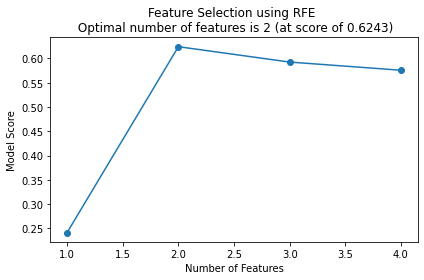

In [61]:
plt.plot(range(1, len(fit.cv_results_['mean_test_score']) + 1), fit.cv_results_['mean_test_score'], marker = "o")
plt.ylabel("Model Score")
plt.xlabel("Number of Features")
plt.title(f"Feature Selection using RFE \n Optimal number of features is {optimal_feature_count} (at score of {round(max(fit.cv_results_['mean_test_score']),4)})")
plt.tight_layout()
plt.show()

Note on updates to scikit-learn. If you are using sklearn version 1.0 or greater - this will most likely apply

Instead of fit.grid_scores_ to get (and then plot) our results we now must use fit.cv_results_['mean_test_score']

In the tutorial, we use fit._grid_scores_ three times in our plotting code - each of these need to be updated to the new code.

Your plot code will now need to look like this instead:

# Model Validation & Over-fitting (PRACTICAL)

In [ ]:
# model validation 
data_path = "C:/Users/eacalder/Documents/Education/DataScienceInfinity/Leasson_Downloads/H_Cleaning/feature_selection_sample_data.csv"
model_data = pd.read_csv(data_path)
model_data.head()

In [62]:
# test/train split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

x = model_data.drop(["output"],axis=1)
y = model_data["output"]

In [64]:
# Regression model 
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y, 
                                                    test_size=.2,
                                                    random_state=42)

# stratify = y or something for classification 
# Classificaiton model
# x_train, x_test, y_train, y_test = train_test_split(x,
#                                                     y, 
#                                                     test_size=.2,
#                                                     random_state=42,
#                                                     stratify=y)
print(x_train)

    input1  input2  input3  input4
31     594     645     407     600
3      416     444     330     582
52     321     342     350     486
17     337     261     236     463
8      431     364     672     420
6      380     386     408     532
40     303     346     692     544
4      520     464     104     412
43     478     511     156     598
19     332     294     574     566
34     389     948     229     555
58     458     461     502     401
25     452     465     569     454
56     448     411     594     519
15     463     424     289     541
27     429     502     106     588
9      574     611     182     422
30     514     455     412     466
26     486     459     204     418
16     574     638     702     453
24     563     492     565     597
55     395     459     738     558
11     281     266     461     528
32     362     439     752     484
53     376     400     727     518
41     430     442     188     535
37     449     442     371     582
29     509     486  

In [65]:
print(x_test)

    input1  input2  input3  input4
0      534     536     466     599
5       81     415     705     444
36     592     557     407     422
45     407     359     667     582
13      55     350     511     495
54     525     592     482     539
33     585     551     520     519
48     480     535     702     522
12     323     377     487     517
57     271     265     410     433
46     387     414     119     523
50     477     407     305     520


In [66]:
print(y_train)

31    598
3     438
52    334
17    391
8     349
6     436
40    296
4     547
43    402
19    284
34    617
58    533
25    418
56    349
15    522
27    544
9     540
30    553
26    490
16    531
24    598
55    376
11    252
32    496
53    367
41    361
37    358
29    532
44    573
1     182
21    416
2     323
47    587
39    410
35    489
23    232
49    329
10    373
22    330
18    374
59    190
20    598
7     656
42    405
14    387
28    404
51    615
38    585
Name: output, dtype: int64


In [67]:
print(y_test)
#we want it shuffled so leave as is

0     564
5     291
36    625
45    329
13    238
54    631
33    562
48    471
12    419
57    173
46    339
50    449
Name: output, dtype: int64


In [68]:
regressor = LinearRegression()
regressor.fit(x,y)
y_pred = regressor.predict(x_test) 
print(y_pred)

[532.4377405  239.87776845 576.36771072 385.019222   194.74839626
 554.46785928 568.25033487 505.51514549 349.28141143 271.99439579
 399.01089187 444.37731913]


In [69]:
r2_score(y_test,y_pred)
# the higher the better 

0.8581503770360923

In [70]:
# cross validation
# cv specify the number of folds, by default 5 
# r squared to asses the model
# there are some differences of the 4 output and we now take the average
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
cv_scores =cross_val_score(regressor,x,y,cv=4,scoring="r2")
print(cv_scores)


[0.78287124 0.57838871 0.45187443 0.7384809 ]


In [71]:
cv_scores.mean()

0.637903817215319

In [72]:
# we are thinking the previous score of ~.83 was over inflated 
# regression
cv = KFold(n_splits=4,shuffle=True,random_state=42)
cv_scores =cross_val_score(regressor,x,y,cv=cv,scoring="r2")
print(cv_scores)


[0.84955651 0.52174323 0.76004686 0.69987415]


In [73]:
cv_scores.mean()

0.7078051873514346

In [ ]:
# classification
cv = StratifiedKFold(n_splits=4,shuffle=True,random_state=42)
cv_scores =cross_val_score(clf,x,y,cv=cv,scoring="accuracy")
print(cv_scores)


In [ ]:
cv_scores.mean()